## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
import datetime
from keras import regularizers
import matplotlib.pyplot as plt
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

## Exploring Dataset

In [2]:
train_dir = 'images/train/'
test_dir = 'images/validation/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3993      436  4103   7164     4982  4938      3205
      angry  disgust  fear  happy  neutral   sad  surprise
test    960      111  1018   1825     1216  1139       797


<Axes: >

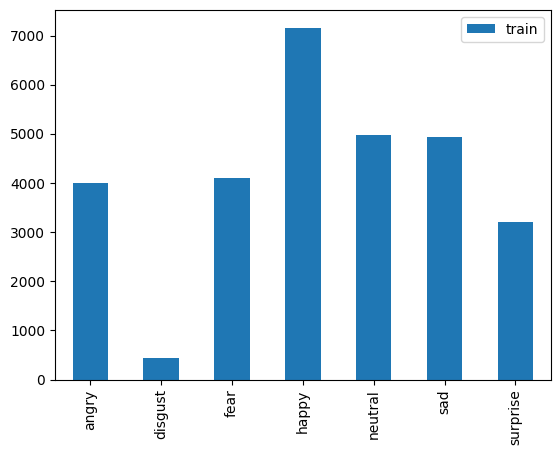

In [3]:
train_count.transpose().plot(kind='bar')

<Axes: >

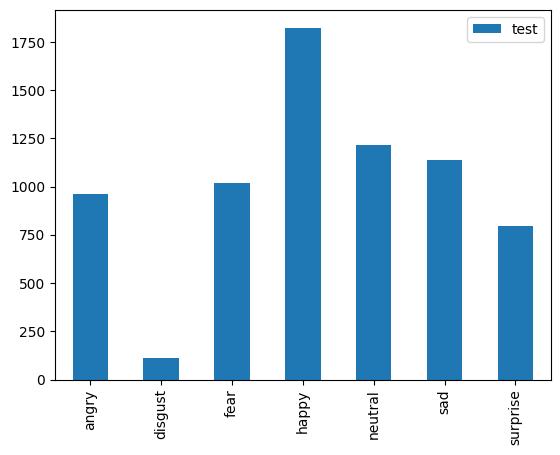

In [4]:
test_count.transpose().plot(kind='bar')

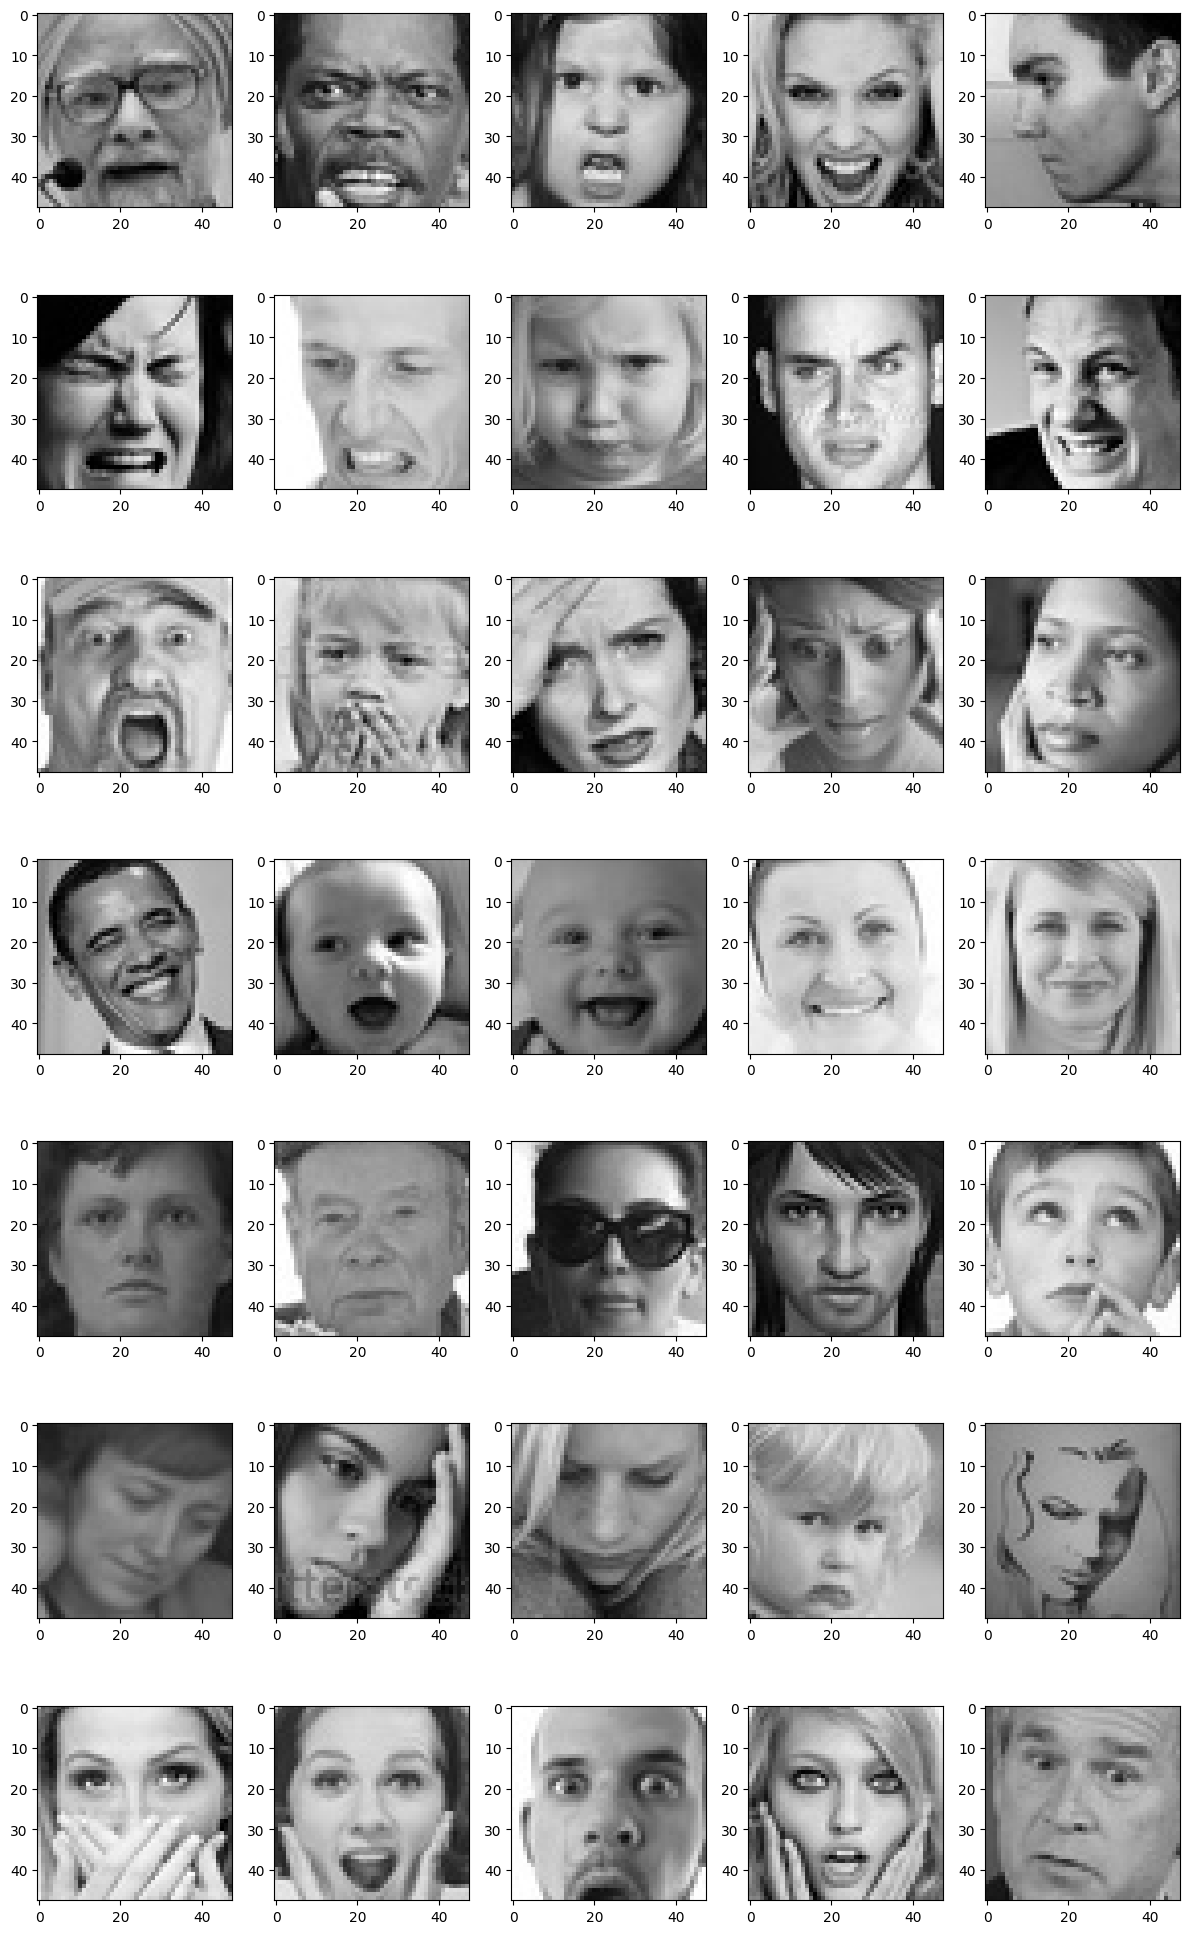

In [5]:

# plt.figure(figsize=(14, 22))
# i = 1
# for expression in os.listdir(train_dir):
#     img_path = os.path.join(train_dir, expression, os.listdir(os.path.join(train_dir, expression))[5])
#     img = load_img(img_path, color_mode='grayscale')  # Load images in grayscale
#
#     plt.subplot(1, 7, 0)
#     plt.imshow(img, cmap='gray')  # Set the colormap to grayscale
#     plt.title(expression)
#     plt.axis('off')
#     i += 1
#
# plt.show()


# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show(3)

## Creating train test and validation datasets

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='training')
validation_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 23060 images belonging to 7 classes.
Found 5761 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
# labels 
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Model Architecture

In [8]:
weight_decay = 1e-4

num_classes = 7

model = tf.keras.models.Sequential()

model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(Activation('elu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0003), metrics=['accuracy'])
 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1088      
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        65600     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                     

In [9]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 10),
                ModelCheckpoint(
                    filepath='model.weights.best.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

## Model Training

In [21]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size

history = model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=50,
                 callbacks=[checkpointer],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/50
360/360 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.7991
Epoch 1: val_accuracy did not improve from 0.62066
360/360 [==============================] - 126s 349ms/step - loss: 0.6245 - accuracy: 0.7991 - val_loss: 1.3344 - val_accuracy: 0.6118
Epoch 2/50
360/360 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.8078
Epoch 2: val_accuracy did not improve from 0.62066
360/360 [==============================] - 129s 357ms/step - loss: 0.6005 - accuracy: 0.8078 - val_loss: 1.3241 - val_accuracy: 0.6167
Epoch 3/50
360/360 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.8138
Epoch 3: val_accuracy did not improve from 0.62066
360/360 [==============================] - 129s 359ms/step - loss: 0.5882 - accuracy: 0.8138 - val_loss: 1.3524 - val_accuracy: 0.6094
Epoch 4/50
360/360 [==============================] - ETA: 0s - loss: 0.5717 - accuracy: 0.8206
Epoch 4: val_accuracy did not improve from 0.62066
360/360

D:\MyWork\DataScience\HRChatBot\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


360/360 [==============================] - ETA: 0s - loss: 0.5476 - accuracy: 0.8290
Epoch 6: val_accuracy did not improve from 0.62240
360/360 [==============================] - 130s 361ms/step - loss: 0.5476 - accuracy: 0.8290 - val_loss: 1.3451 - val_accuracy: 0.6130
Epoch 7/50
360/360 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.8368
Epoch 7: val_accuracy did not improve from 0.62240
360/360 [==============================] - 131s 364ms/step - loss: 0.5336 - accuracy: 0.8368 - val_loss: 1.4276 - val_accuracy: 0.6139
Epoch 8/50
360/360 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.8437
Epoch 8: val_accuracy did not improve from 0.62240
360/360 [==============================] - 131s 365ms/step - loss: 0.5158 - accuracy: 0.8437 - val_loss: 1.4321 - val_accuracy: 0.6135
Epoch 9/50
360/360 [==============================] - ETA: 0s - loss: 0.4991 - accuracy: 0.8492
Epoch 9: val_accuracy did not improve from 0.62240
360/360 [=========

## Model Performance

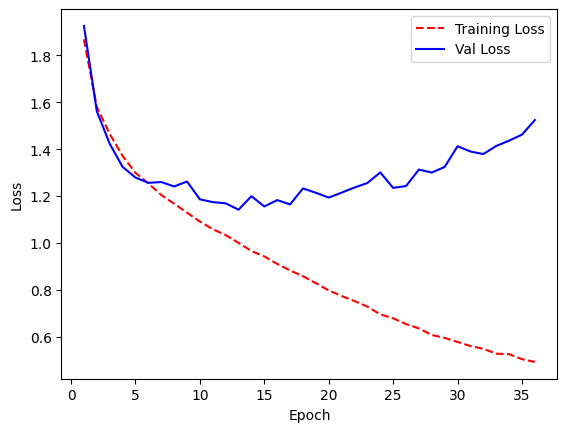

In [12]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use(['default'])
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

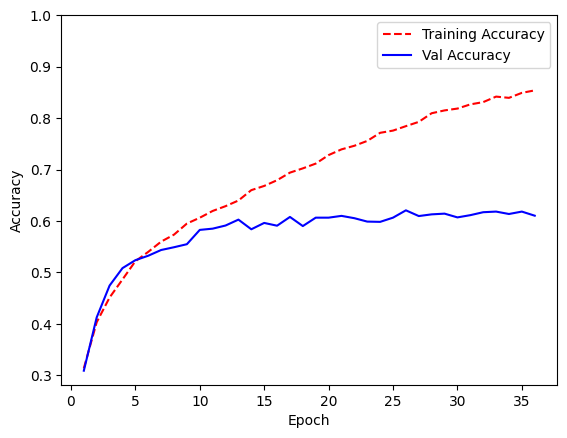

In [13]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

In [14]:
# saving the model
model.save("fer_model.h5")

D:\MyWork\DataScience\HRChatBot\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test Accuracy

In [15]:
print(f"Test accuracy = {model.evaluate(test_set ,batch_size=test_set.batch_size,steps=test_set.n // test_set.batch_size)[1]*100}%")

110/110 [==============================] - 56s 508ms/step - loss: 1.2092 - accuracy: 0.6263
Test accuracy = 62.62784004211426%


## Confusion Matrix

### Confusion matrix on Training Set

361/361 [==============================] - 36s 100ms/step
Confusion Matrix
[[ 387   42  410  830  590  557  379]
 [  57    3   45   87   63   57   37]
 [ 472   43  394  818  634  556  366]
 [ 773   89  722 1491 1040  992  625]
 [ 504   65  548 1007  732  702  428]
 [ 541   58  489 1044  746  642  431]
 [ 334   38  342  663  454  437  296]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.12      0.12      3195
     disgust       0.01      0.01      0.01       349
        fear       0.13      0.12      0.13      3283
       happy       0.25      0.26      0.26      5732
     neutral       0.17      0.18      0.18      3986
         sad       0.16      0.16      0.16      3951
    surprise       0.12      0.12      0.12      2564

    accuracy                           0.17     23060
   macro avg       0.14      0.14      0.14     23060
weighted avg       0.17      0.17      0.17     23060



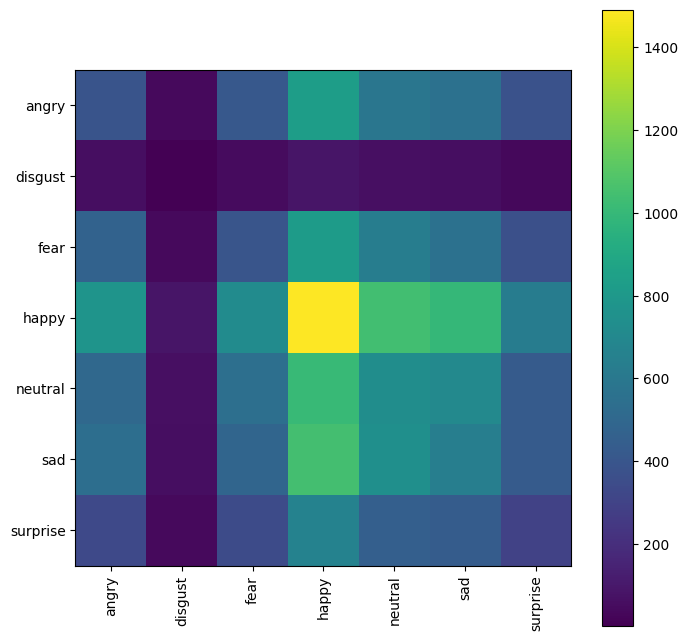

In [16]:
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

### Confusion Matrix on Validation Dataset

91/91 [==============================] - 10s 106ms/step
Confusion Matrix
[[107   8 106 218 147 128  84]
 [  8   3  13  26  14  17   6]
 [103  10 100 220 178 132  77]
 [168  18 160 415 265 246 160]
 [127  10 118 283 181 162 115]
 [117   6 115 288 188 168 105]
 [ 77   4  68 189 141  97  65]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.13      0.14       798
     disgust       0.05      0.03      0.04        87
        fear       0.15      0.12      0.13       820
       happy       0.25      0.29      0.27      1432
     neutral       0.16      0.18      0.17       996
         sad       0.18      0.17      0.17       987
    surprise       0.11      0.10      0.10       641

    accuracy                           0.18      5761
   macro avg       0.15      0.15      0.15      5761
weighted avg       0.18      0.18      0.18      5761



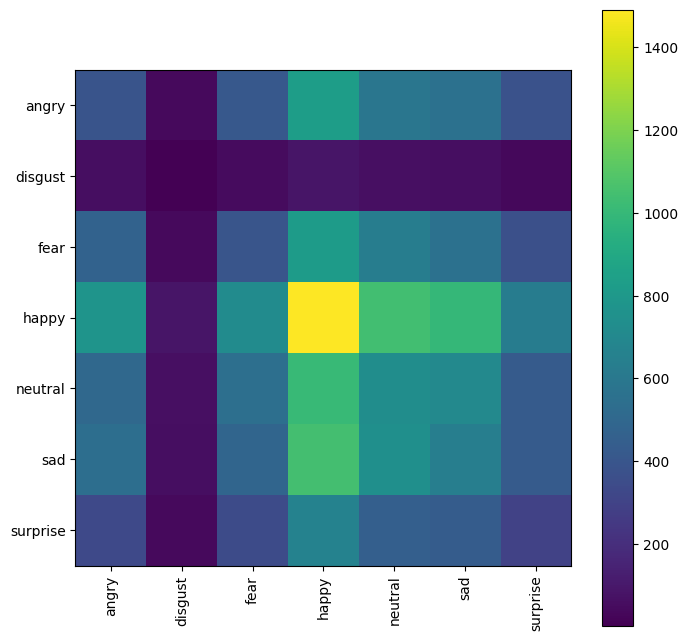

In [17]:
y_pred = model.predict(validation_set)
y_pred = np.argmax(y_pred, axis=1)
cm_val = confusion_matrix(validation_set.classes, y_pred)
print('Confusion Matrix')
print(cm_val)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

## Confusion Matrix on Test Dataset

111/111 [==============================] - 12s 107ms/step
Confusion Matrix
[[123   8 121 273 166 168 101]
 [ 14   2  12  35  20  19   9]
 [128  14 112 290 198 177  99]
 [233  27 222 513 326 287 217]
 [156  13 137 354 231 191 134]
 [143  14 125 315 219 202 121]
 [ 86  12  93 238 151 136  81]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.13      0.13       960
     disgust       0.02      0.02      0.02       111
        fear       0.14      0.11      0.12      1018
       happy       0.25      0.28      0.27      1825
     neutral       0.18      0.19      0.18      1216
         sad       0.17      0.18      0.17      1139
    surprise       0.11      0.10      0.10       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.17      0.18      0.18      7066



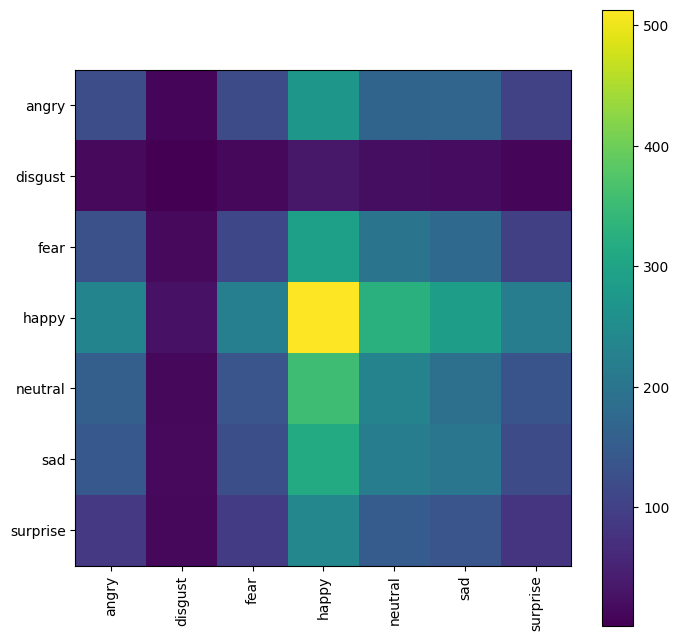

In [18]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

## Plotting Predictions

In [19]:
# next function assigns one batch to variables, i.e x_test,y_test will have 64 images
x_test,y_test = next(test_set)
predict = model.predict(x_test)

2/2 [==============================] - 0s 60ms/step


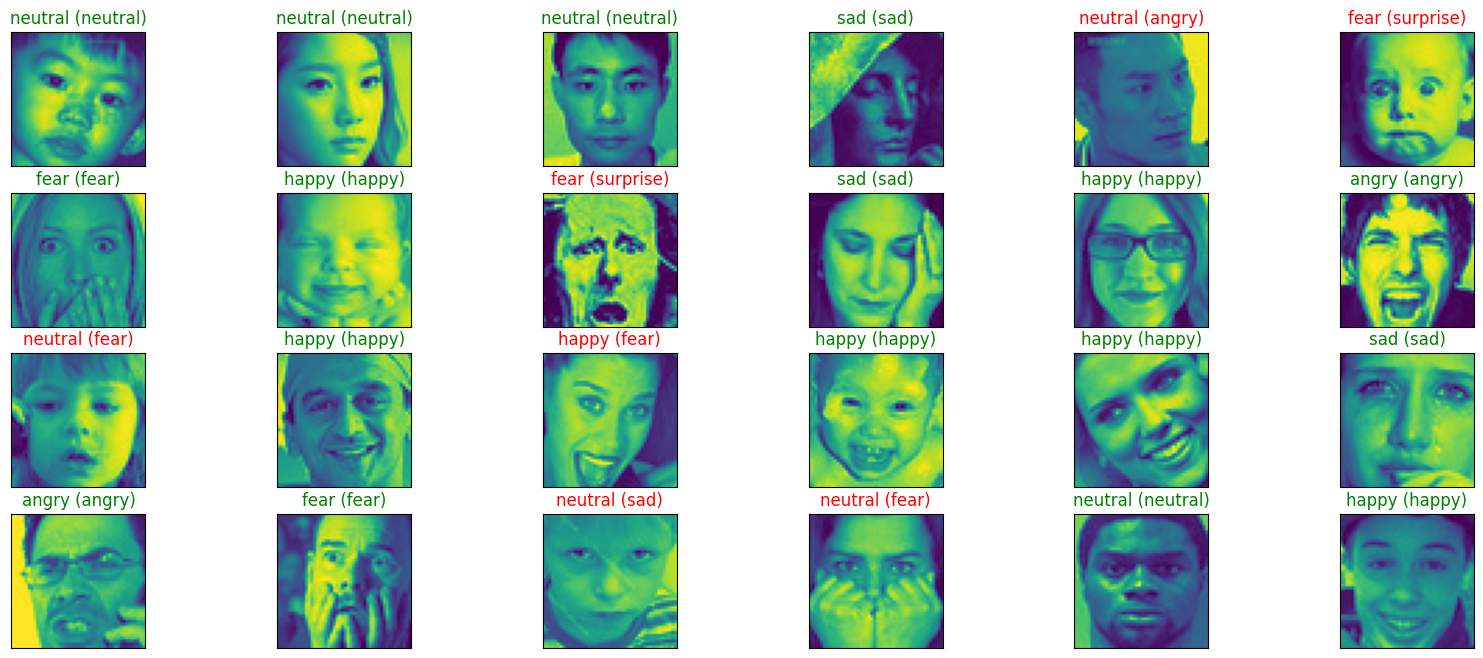

In [20]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = class_labels[(np.argmax(predict[index]))]
    true_index = class_labels[(np.argmax(y_test[index]))]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))